In [6]:
import numpy as np
import matplotlib.pyplot as plt

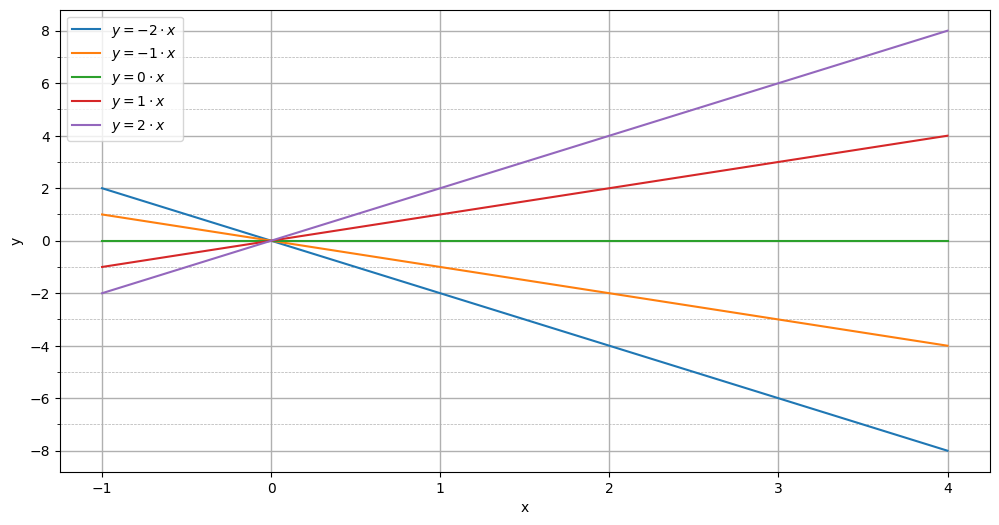

In [7]:
from matplotlib import lines


X = np.arange(-1, 5, 1)
fig = plt.figure(figsize=(12, 6))
for k in [-2, -1, 0, 1, 2]:
    y = X * k
    plt.plot(X, y, label=rf'$y={k} \cdot x$')

plt.xlabel("x")
plt.ylabel("y")
plt.yticks(np.arange(-8, 9, 1), minor=True)
plt.legend()
plt.grid(which='minor', linestyle='--', linewidth=0.5)
plt.grid(which='major', linestyle='-', linewidth=1)
plt.show()

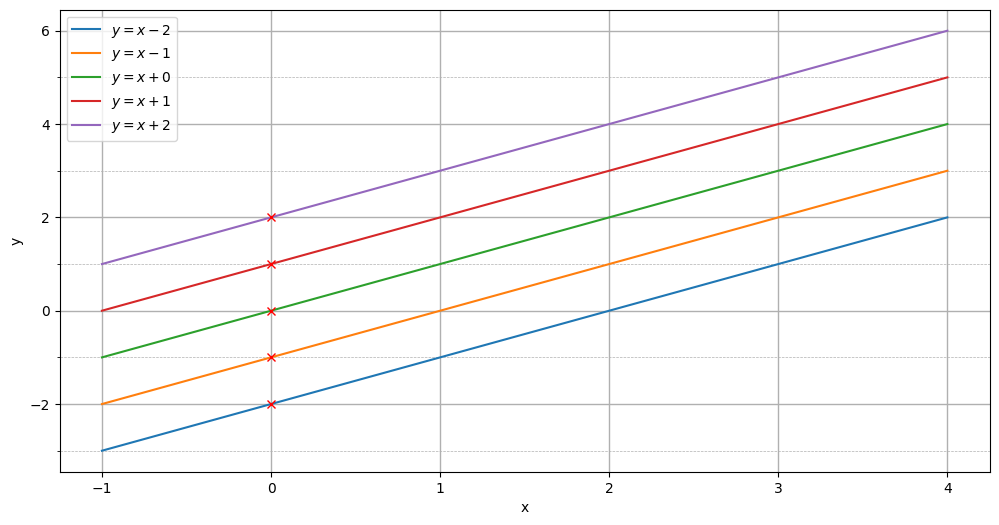

In [8]:
X = np.arange(-1, 5, 1)
fig = plt.figure(figsize=(12, 6))
for m in [-2, -1, 0, 1, 2]:
    y = X + m
    plt.plot(X, y, label=rf'$y=x{'+' if m >= 0 else ''}{m}$')
    plt.plot(0, m, 'rx')

plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.yticks(np.arange(-3, 6, 1), minor=True)
plt.grid(which='minor', linestyle='--', linewidth=0.5)
plt.grid(which='major', linestyle='-', linewidth=1)
plt.show()

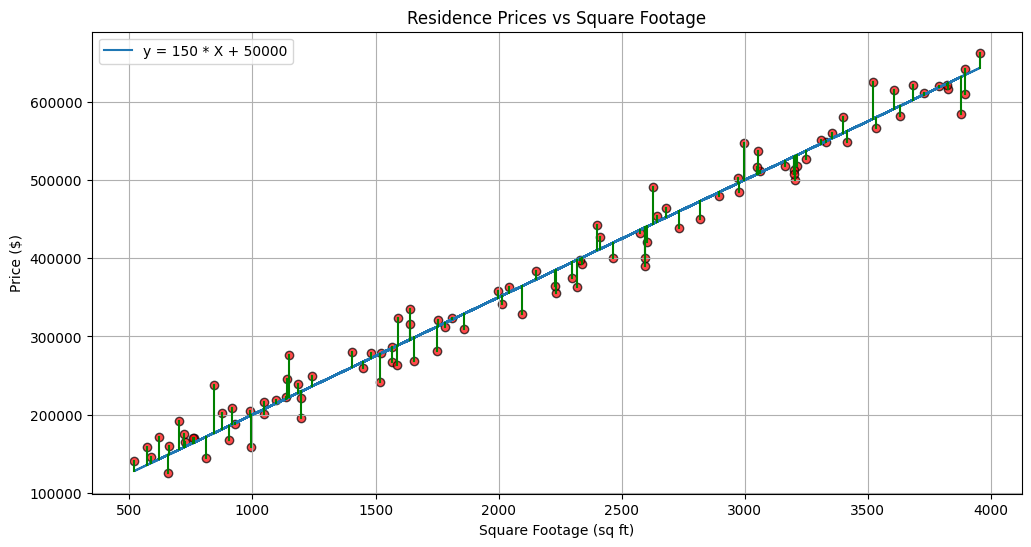

In [9]:
# Generate data
np.random.seed(42)  # For reproducibility
X = np.random.uniform(500, 4000, 100)  # Square footage between 500 and 4000
noise = np.random.normal(0, 25000, 100)  # Noise with standard deviation of 5000
y = 150 * X + 50000 + noise  # Linear relationship with noise

y1 = 100 * X + 50000
y2 = 150 * X + 50000
y3 = 200 * X + 50000


# Plot the data
fig = plt.figure(figsize=(12, 6))
plt.scatter(X, y, alpha=0.7, edgecolors='k', color='red')
plt.plot(X, y2, label='y = 150 * X + 50000')

# plt.plot(X, y1, label='y = 100 * X + 50000')
# plt.plot(X, y3, label='y = 200 * X + 50000')

for k in range(0, 100):
    plt.plot([X[k], X[k]], [y[k], 150 * X[k] + 50000], color='green', linestyle='-', alpha=1)
plt.title("Residence Prices vs Square Footage")
plt.xlabel("Square Footage (sq ft)")
plt.ylabel("Price ($)")
plt.legend()
plt.grid()
plt.show()

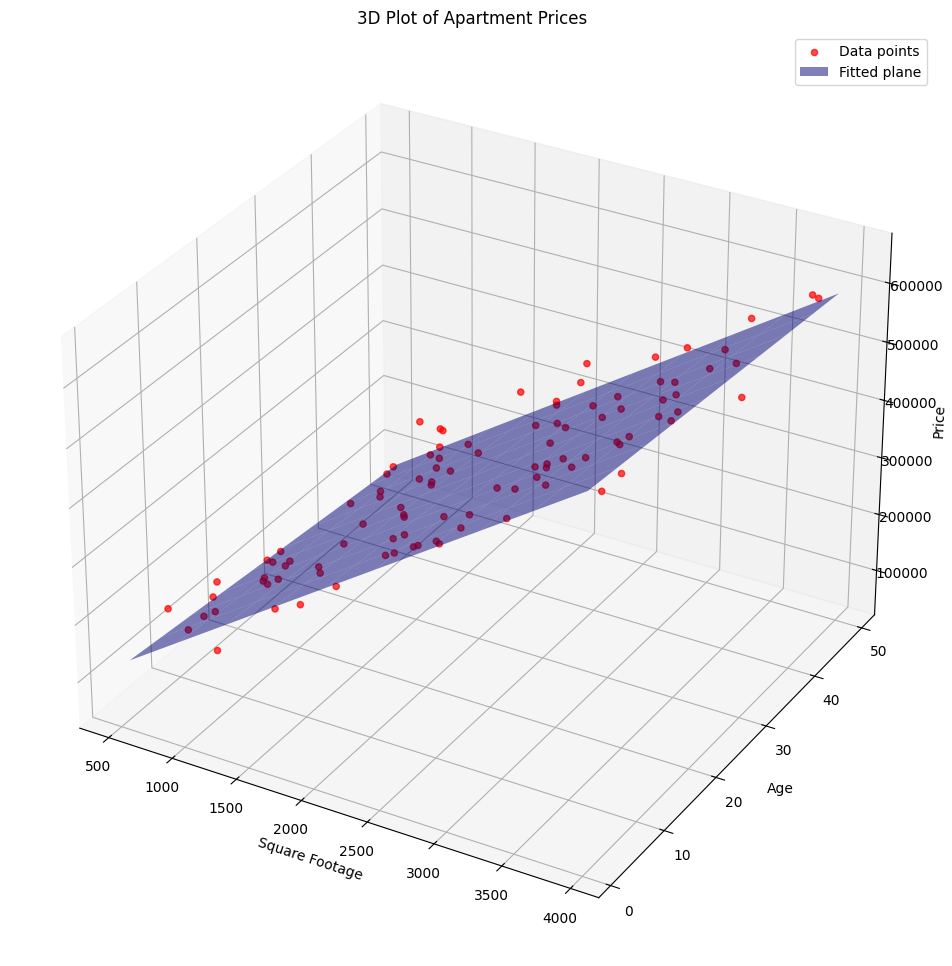

In [10]:
from mpl_toolkits.mplot3d import Axes3D

# Generate 2D data points
np.random.seed(42)  # For reproducibility
sq_footage = np.random.uniform(500, 4000, 100)  # Square footage
age = np.random.uniform(1, 50, 100)  # Age of the apartment
X_2d = np.column_stack((sq_footage, age))

# Generate y as a linear function of X_2d plus noise
noise = np.random.normal(0, 25000, 100)  # Noise
y_2d = 150 * sq_footage - 1000 * age + 50000 + noise

# Fit a plane to the data
# from sklearn.linear_model import LinearRegression
# model = LinearRegression()
# model.fit(X_2d, y_2d)
# y_plane = model.predict(X_2d)

# Plot the 3D data points and the plane
# fig = plt.figure(figsize=(12, 8))
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(sq_footage, age, y_2d, color='red', label='Data points', alpha=0.7)

# Create a meshgrid for the plane
sq_footage_range = np.linspace(sq_footage.min(), sq_footage.max(), 10)
age_range = np.linspace(age.min(), age.max(), 10)
sq_footage_mesh, age_mesh = np.meshgrid(sq_footage_range, age_range)
y_mesh = 50000 + 150 * sq_footage_mesh - 1000 * age_mesh

# # Plot the plane
ax.plot_surface(sq_footage_mesh, age_mesh, y_mesh, color='blue', alpha=0.5, label='Fitted plane')

# Labels and legend
ax.set_xlabel('Square Footage')
ax.set_ylabel('Age')
ax.set_zlabel('Price')
plt.title('3D Plot of Apartment Prices')
plt.legend()
plt.show()

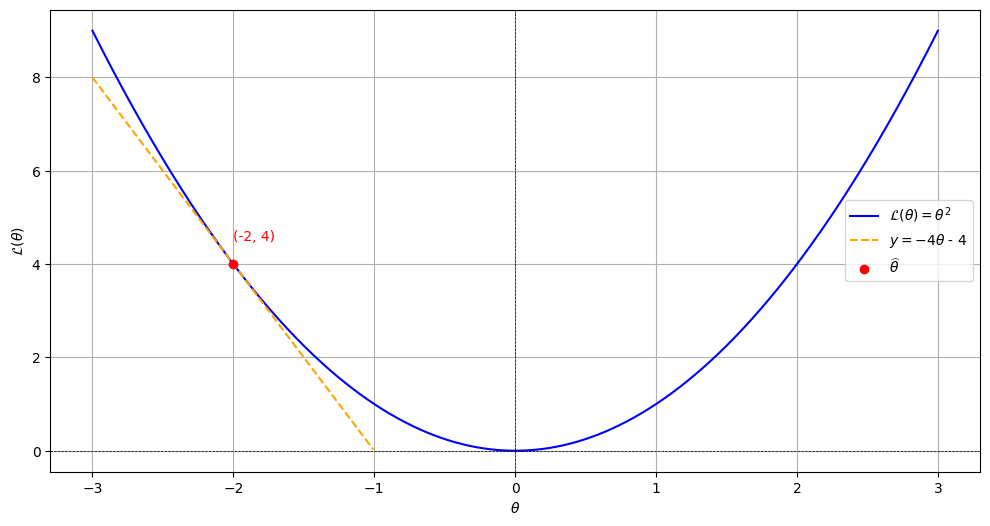

In [40]:
# Define the quadratic loss function and its derivative
def loss_function(x):
    return x**2

def gradient(x):
    return 2 * x

# Define the current parameter value
current_x = -2  # Example value
current_y = loss_function(current_x)

# Generate data for the loss function
x_vals = np.linspace(-3, 3, 1000)
y_vals = loss_function(x_vals)

# Generate data for the tangent line
tangent_slope = gradient(current_x)
tangent_intercept = current_y - tangent_slope * current_x
tangent_line = tangent_slope * x_vals + tangent_intercept
tangent_line_idxs = np.where(tangent_line > 0)

# Plot the loss function and the tangent line
plt.figure(figsize=(12, 6))
plt.plot(x_vals, y_vals, label="$\\mathcal{L}(\\theta)=\\theta^2$", color="blue")
plt.plot(x_vals[tangent_line_idxs], tangent_line[tangent_line_idxs], label=f"$y={tangent_slope}\\theta$ {'+' if tangent_intercept > 0 else '-'} {abs(tangent_intercept)}", color="orange", linestyle="--")
plt.scatter(current_x, current_y, color="red", label="$\\widehat{\\theta}$", zorder=5)
plt.text(current_x, current_y + 0.5, f"({current_x}, {current_y})", color="red")

# Add labels, legend, and grid
plt.xlabel("$\\theta$")
plt.ylabel('$\\mathcal{L}(\\theta)$')
plt.axhline(0, color="black", linewidth=0.5, linestyle="--")
plt.axvline(0, color="black", linewidth=0.5, linestyle="--")
plt.legend()
plt.grid()
plt.show()

In [14]:
tangent_line_idxs = np.where(tangent_line > 0)
tangent_line[tangent_line_idxs]

array([0.24242424, 0.48484848, 0.72727273, 0.96969697, 1.21212121,
       1.45454545, 1.6969697 , 1.93939394, 2.18181818, 2.42424242,
       2.66666667, 2.90909091, 3.15151515, 3.39393939, 3.63636364,
       3.87878788, 4.12121212, 4.36363636, 4.60606061, 4.84848485,
       5.09090909, 5.33333333, 5.57575758, 5.81818182, 6.06060606,
       6.3030303 , 6.54545455, 6.78787879, 7.03030303, 7.27272727,
       7.51515152, 7.75757576, 8.        ])

In [ ]:
# Define the quadratic loss function and its derivative
def loss_function(x):
    return x**2

def gradient(x):
    return 2 * x

# Define the current parameter value
current_x = 2  # Example value
current_y = loss_function(current_x)

# Generate data for the loss function
x_vals = np.linspace(-3, 3, 100)
y_vals = loss_function(x_vals)

# Generate data for the tangent line
tangent_slope = gradient(current_x)
tangent_intercept = current_y - tangent_slope * current_x
tangent_line = tangent_slope * x_vals + tangent_intercept

# Plot the loss function and the tangent line
plt.figure(figsize=(8, 6))
plt.plot(x_vals, y_vals, label="Loss Function: $y = x^2$", color="blue")
plt.plot(x_vals, tangent_line, label="Tangent Line", color="orange", linestyle="--")
plt.scatter(current_x, current_y, color="red", label="Current Parameters (X)", zorder=5)
plt.text(current_x, current_y + 0.5, f"({current_x}, {current_y})", color="red")

# Add labels, legend, and grid
plt.xlabel("Parameter (x)")
plt.ylabel("Loss (y)")
plt.title("Gradient Descent Visualization")
plt.axhline(0, color="black", linewidth=0.5, linestyle="--")
plt.axvline(0, color="black", linewidth=0.5, linestyle="--")
plt.legend()
plt.grid()
plt.show()